In [1]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.models.model import VSpyct
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = SurvivalDataset(fname='pbc.rda', path='../data/raw/')
print(data.dataset.head())
X_train, X_test, y_train, y_test = data.get_tensors()

   id  time  status trt        age sex ascites hepato spiders  edema  bili  \
0   1   400       2   1  58.765229   f       1      1       1    1.0  14.5   
1   2  4500       0   1  56.446270   f       0      1       1    0.0   1.1   
2   3  1012       2   1  70.072553   m       0      0       0    0.5   1.4   
3   4  1925       2   1  54.740589   f       0      1       1    0.5   1.8   
4   5  1504       1   2  38.105407   f       0      1       1    0.0   3.4   

  chol  albumin copper  alk.phos     ast trig platelet  protime stage  
0  261     2.60    156    1718.0  137.95  172      190     12.2     4  
1  302     4.14     54    7394.8  113.52   88      221     10.6     3  
2  176     3.48    210     516.0   96.10   55      151     12.0     4  
3  244     2.54     64    6121.8   60.63   92      183     10.3     4  
4  279     3.53    143     671.0  113.15   72      136     10.9     3  
4795
Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 

In [3]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)

Total variance: 569.7177124023438
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 3/500 [00:00<01:01,  8.08it/s]

[iteration 0001] loss: 509560302796.8000
[iteration 0002] loss: 469467950694.4000
[iteration 0003] loss: 409504926105.6000


Epochs:   1%|          | 5/500 [00:00<00:48, 10.21it/s]

[iteration 0004] loss: 384179749068.8000
[iteration 0005] loss: 356355998310.4000
[iteration 0006] loss: 317403060019.2000


Epochs:   2%|▏         | 9/500 [00:00<00:40, 12.14it/s]

[iteration 0007] loss: 287869925683.2000
[iteration 0008] loss: 267096859750.4000
[iteration 0009] loss: 242924402380.8000


Epochs:   2%|▏         | 11/500 [00:01<00:38, 12.64it/s]

[iteration 0010] loss: 221912036966.4000
[iteration 0011] loss: 205383731404.8000
[iteration 0012] loss: 188574056755.2000


Epochs:   3%|▎         | 15/500 [00:01<00:36, 13.25it/s]

[iteration 0013] loss: 169898595430.4000
[iteration 0014] loss: 156517294297.6000
[iteration 0015] loss: 144882208576.0000


Epochs:   3%|▎         | 17/500 [00:01<00:37, 13.02it/s]

[iteration 0016] loss: 135539102432.0000
[iteration 0017] loss: 123473142480.0000
[iteration 0018] loss: 112190056937.6000


Epochs:   4%|▍         | 21/500 [00:01<00:35, 13.43it/s]

[iteration 0019] loss: 103900655886.2000
[iteration 0020] loss: 102409723226.6000
[iteration 0021] loss: 94491471789.8000


Epochs:   5%|▍         | 23/500 [00:01<00:35, 13.55it/s]

[iteration 0022] loss: 85589494412.0750
[iteration 0023] loss: 85655220724.7984
[iteration 0024] loss: 78944772871.7500


Epochs:   5%|▌         | 27/500 [00:02<00:35, 13.49it/s]

[iteration 0025] loss: 74760702587.7166
[iteration 0026] loss: 71118246926.8000
[iteration 0027] loss: 69572198650.5500


Epochs:   6%|▌         | 29/500 [00:02<00:34, 13.59it/s]

[iteration 0028] loss: 66344965406.3375
[iteration 0029] loss: 63402273639.7000
[iteration 0030] loss: 61018787076.7984


Epochs:   7%|▋         | 33/500 [00:02<00:35, 13.26it/s]

[iteration 0031] loss: 60725666219.9500
[iteration 0032] loss: 58531044672.4977
[iteration 0033] loss: 54527887139.8156


Epochs:   7%|▋         | 35/500 [00:02<00:34, 13.31it/s]

[iteration 0034] loss: 53745144933.4000
[iteration 0035] loss: 53808995134.4000
[iteration 0036] loss: 51451132028.1000


Epochs:   8%|▊         | 39/500 [00:03<00:35, 13.14it/s]

[iteration 0037] loss: 51894170328.0000
[iteration 0038] loss: 50455010195.7969
[iteration 0039] loss: 50067693199.2289


Epochs:   8%|▊         | 41/500 [00:03<00:34, 13.30it/s]

[iteration 0040] loss: 49091025065.6750
[iteration 0041] loss: 48395902066.2672
[iteration 0042] loss: 47300283923.6570


Epochs:   9%|▉         | 45/500 [00:03<00:33, 13.61it/s]

[iteration 0043] loss: 48171417776.5281
[iteration 0044] loss: 46332919105.8000
[iteration 0045] loss: 47102410164.0564


Epochs:   9%|▉         | 47/500 [00:03<00:33, 13.63it/s]

[iteration 0046] loss: 45781222076.3000
[iteration 0047] loss: 46611043196.8070
[iteration 0048] loss: 48255623108.6187


Epochs:  10%|█         | 51/500 [00:03<00:32, 13.73it/s]

[iteration 0049] loss: 45085741845.6000
[iteration 0050] loss: 47170886759.6500
[iteration 0051] loss: 46356061430.5312


Epochs:  10%|█         | 51/500 [00:04<00:35, 12.63it/s]


Early stopping at epoch 51.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(560.8324)
Var right tensor(574.5551)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 2/500 [00:00<00:25, 19.25it/s]

[iteration 0001] loss: 292627079577.6000
[iteration 0002] loss: 262881909145.6000
[iteration 0003] loss: 241538538291.2000


Epochs:   1%|          | 4/500 [00:00<00:27, 18.34it/s]

[iteration 0004] loss: 229817451724.8000


Epochs:   1%|          | 6/500 [00:00<00:26, 18.64it/s]

[iteration 0005] loss: 210903746764.8000
[iteration 0006] loss: 194615787315.2000
[iteration 0007] loss: 181786522419.2000


Epochs:   2%|▏         | 8/500 [00:00<00:25, 19.04it/s]

[iteration 0008] loss: 164724217548.8000


Epochs:   2%|▏         | 10/500 [00:00<00:26, 18.63it/s]

[iteration 0009] loss: 154621650329.6000
[iteration 0010] loss: 141552891392.0000
[iteration 0011] loss: 131728723148.8000


Epochs:   2%|▏         | 12/500 [00:00<00:26, 18.47it/s]

[iteration 0012] loss: 121051756134.4000


Epochs:   3%|▎         | 14/500 [00:00<00:26, 18.43it/s]

[iteration 0013] loss: 112177213644.8000
[iteration 0014] loss: 102490477772.8000
[iteration 0015] loss: 96098624870.4000


Epochs:   3%|▎         | 16/500 [00:00<00:25, 18.85it/s]

[iteration 0016] loss: 90550819737.6000


Epochs:   4%|▎         | 18/500 [00:00<00:25, 18.96it/s]

[iteration 0017] loss: 79066445004.8000
[iteration 0018] loss: 76991009177.6000
[iteration 0019] loss: 68605260390.4000


Epochs:   4%|▍         | 20/500 [00:01<00:24, 19.21it/s]

[iteration 0020] loss: 65670835251.2000


Epochs:   4%|▍         | 22/500 [00:01<00:25, 18.93it/s]

[iteration 0021] loss: 58914364659.2000
[iteration 0022] loss: 58225416921.6000
[iteration 0023] loss: 52833205100.8000


Epochs:   5%|▍         | 24/500 [00:01<00:25, 18.77it/s]

[iteration 0024] loss: 45613839827.2000


Epochs:   5%|▌         | 26/500 [00:01<00:25, 18.28it/s]

[iteration 0025] loss: 43872897713.6000
[iteration 0026] loss: 41207632387.6000
[iteration 0027] loss: 40158065252.8000


Epochs:   6%|▌         | 28/500 [00:01<00:25, 18.41it/s]

[iteration 0028] loss: 38350334730.8000


Epochs:   6%|▌         | 30/500 [00:01<00:25, 18.56it/s]

[iteration 0029] loss: 32800181027.8309
[iteration 0030] loss: 31052015484.0000
[iteration 0031] loss: 31146990268.6000


Epochs:   6%|▋         | 32/500 [00:01<00:24, 18.85it/s]

[iteration 0032] loss: 27734334741.9000


Epochs:   7%|▋         | 34/500 [00:01<00:24, 18.79it/s]

[iteration 0033] loss: 29724348517.7625
[iteration 0034] loss: 26171612680.1760
[iteration 0035] loss: 23305005897.8000


Epochs:   7%|▋         | 36/500 [00:01<00:24, 18.69it/s]

[iteration 0036] loss: 23142800960.3363


Epochs:   8%|▊         | 38/500 [00:02<00:25, 18.39it/s]

[iteration 0037] loss: 21649069626.3250
[iteration 0038] loss: 21597149183.1094
[iteration 0039] loss: 20508437485.2875


Epochs:   8%|▊         | 40/500 [00:02<00:25, 18.21it/s]

[iteration 0040] loss: 19939137143.8000


Epochs:   8%|▊         | 42/500 [00:02<00:25, 18.28it/s]

[iteration 0041] loss: 18341752876.5422
[iteration 0042] loss: 17228791615.5000
[iteration 0043] loss: 18443425444.2938


Epochs:   9%|▉         | 44/500 [00:02<00:24, 18.59it/s]

[iteration 0044] loss: 16399803505.2625


Epochs:   9%|▉         | 46/500 [00:02<00:24, 18.63it/s]

[iteration 0045] loss: 17091391646.9000
[iteration 0046] loss: 14753523540.1000
[iteration 0047] loss: 16842068293.5906


Epochs:  10%|▉         | 48/500 [00:02<00:23, 18.91it/s]

[iteration 0048] loss: 16082526278.0000


Epochs:  10%|▉         | 48/500 [00:02<00:24, 18.29it/s]


Early stopping at epoch 48.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(587.0242)
Var right tensor(506.6899)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 5/500 [00:00<00:11, 41.29it/s]

[iteration 0001] loss: 213891482419.2000
[iteration 0002] loss: 206900097843.2000
[iteration 0003] loss: 205815598284.8000
[iteration 0004] loss: 200565103820.8000
[iteration 0005] loss: 195873379942.4000
[iteration 0006] loss: 185656396185.6000
[iteration 0007] loss: 186134264217.6000
[iteration 0008] loss: 178072615731.2000
[iteration 0009] loss: 181136406118.4000


Epochs:   2%|▏         | 10/500 [00:00<00:12, 40.01it/s]

[iteration 0010] loss: 178848572620.8000
[iteration 0011] loss: 170544178380.8000
[iteration 0012] loss: 165870980710.4000
[iteration 0013] loss: 159018465280.0000


Epochs:   3%|▎         | 15/500 [00:00<00:13, 36.86it/s]

[iteration 0014] loss: 156103105331.2000
[iteration 0015] loss: 153116198502.4000
[iteration 0016] loss: 151019678515.2000


Epochs:   4%|▍         | 19/500 [00:00<00:12, 37.12it/s]

[iteration 0017] loss: 144784058368.0000
[iteration 0018] loss: 145458654822.4000
[iteration 0019] loss: 145678496972.8000
[iteration 0020] loss: 138379250892.8000
[iteration 0021] loss: 135776079052.8000


Epochs:   5%|▍         | 23/500 [00:00<00:12, 37.03it/s]

[iteration 0022] loss: 132570973798.4000
[iteration 0023] loss: 130006144614.4000
[iteration 0024] loss: 127211065344.0000


Epochs:   5%|▌         | 27/500 [00:00<00:13, 35.70it/s]

[iteration 0025] loss: 121281049395.2000
[iteration 0026] loss: 120812165529.6000
[iteration 0027] loss: 117565317120.0000
[iteration 0028] loss: 119032449843.2000


Epochs:   6%|▌         | 31/500 [00:00<00:12, 36.77it/s]

[iteration 0029] loss: 117393056768.0000
[iteration 0030] loss: 112688096256.0000
[iteration 0031] loss: 110469115904.0000
[iteration 0032] loss: 107182545305.6000


Epochs:   7%|▋         | 35/500 [00:00<00:12, 37.44it/s]

[iteration 0033] loss: 107120364339.2000
[iteration 0034] loss: 103836707020.8000
[iteration 0035] loss: 98995293593.6000
[iteration 0036] loss: 97535286886.4000


Epochs:   8%|▊         | 39/500 [00:01<00:12, 38.13it/s]

[iteration 0037] loss: 96692259225.6000
[iteration 0038] loss: 94360429772.8000
[iteration 0039] loss: 92403412582.4000
[iteration 0040] loss: 90665639116.8000


Epochs:   9%|▊         | 43/500 [00:01<00:11, 38.29it/s]

[iteration 0041] loss: 86494303641.6000
[iteration 0042] loss: 86479639552.0000
[iteration 0043] loss: 82592109977.6000
[iteration 0044] loss: 81298337177.6000


Epochs:   9%|▉         | 47/500 [00:01<00:11, 38.76it/s]

[iteration 0045] loss: 80263491686.4000
[iteration 0046] loss: 79553551155.2000
[iteration 0047] loss: 77361724620.8000
[iteration 0048] loss: 73804142694.4000


Epochs:  10%|█         | 51/500 [00:01<00:11, 38.78it/s]

[iteration 0049] loss: 72384477900.8000
[iteration 0050] loss: 74132393267.2000
[iteration 0051] loss: 73789887180.8000
[iteration 0052] loss: 70256418201.6000


Epochs:  11%|█         | 55/500 [00:01<00:11, 39.11it/s]

[iteration 0053] loss: 70995864268.8000
[iteration 0054] loss: 66702458777.6000
[iteration 0055] loss: 67447151616.0000
[iteration 0056] loss: 65411668480.0000


Epochs:  12%|█▏        | 59/500 [00:01<00:11, 38.06it/s]

[iteration 0057] loss: 63224356352.0000
[iteration 0058] loss: 64293946265.6000
[iteration 0059] loss: 63764454809.6000
[iteration 0060] loss: 60280216883.2000
[iteration 0061] loss: 60811169638.4000
[iteration 0062] loss: 60071909990.4000
[iteration 0063] loss: 57495913420.8000


Epochs:  13%|█▎        | 64/500 [00:01<00:11, 38.94it/s]

[iteration 0064] loss: 57467232614.4000


Epochs:  14%|█▍        | 69/500 [00:01<00:10, 39.49it/s]

[iteration 0065] loss: 55527755366.4000
[iteration 0066] loss: 56349557606.4000
[iteration 0067] loss: 54099787161.6000
[iteration 0068] loss: 53574377932.8000
[iteration 0069] loss: 54734272768.0000
[iteration 0070] loss: 51884360268.8000
[iteration 0071] loss: 50353112832.0000
[iteration 0072] loss: 50746241945.6000
[iteration 0073] loss: 49895088972.8000


Epochs:  15%|█▌        | 76/500 [00:02<00:11, 38.00it/s]


[iteration 0074] loss: 47501671795.2000
[iteration 0075] loss: 49089575577.6000
[iteration 0076] loss: 48537496422.4000
Early stopping at epoch 76.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(456.6559)
Var right tensor(578.5173)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 142176422400.0000
[iteration 0002] loss: 134496036608.0000


Epochs:   1%|          | 6/500 [00:00<00:18, 26.47it/s]

[iteration 0003] loss: 128489645004.8000
[iteration 0004] loss: 119849123430.4000
[iteration 0005] loss: 116231515084.8000
[iteration 0006] loss: 112146272358.4000
[iteration 0007] loss: 106588259737.6000
[iteration 0008] loss: 97791649075.2000


Epochs:   2%|▏         | 12/500 [00:00<00:18, 26.71it/s]

[iteration 0009] loss: 96386761702.4000
[iteration 0010] loss: 89711920883.2000
[iteration 0011] loss: 86561901427.2000
[iteration 0012] loss: 83584646380.8000
[iteration 0013] loss: 79007351715.2000
[iteration 0014] loss: 75424961382.4000


Epochs:   4%|▎         | 18/500 [00:00<00:17, 26.80it/s]

[iteration 0015] loss: 71839897328.8000
[iteration 0016] loss: 70378375268.3000
[iteration 0017] loss: 67291235334.7500
[iteration 0018] loss: 64672602552.7250
[iteration 0019] loss: 64386032681.9500
[iteration 0020] loss: 59018965828.1391


Epochs:   5%|▍         | 24/500 [00:00<00:17, 26.74it/s]

[iteration 0021] loss: 58087717856.7875
[iteration 0022] loss: 56351293146.0438
[iteration 0023] loss: 54084046785.8211
[iteration 0024] loss: 54397173103.2750
[iteration 0025] loss: 51538542411.0500
[iteration 0026] loss: 50390846709.4531


Epochs:   6%|▌         | 30/500 [00:01<00:17, 26.64it/s]

[iteration 0027] loss: 48797619135.0500
[iteration 0028] loss: 48945059080.8000
[iteration 0029] loss: 47700510419.2000
[iteration 0030] loss: 45939791516.8000
[iteration 0031] loss: 46807885587.2000
[iteration 0032] loss: 42520435294.4000


Epochs:   7%|▋         | 34/500 [00:01<00:18, 25.04it/s]

[iteration 0033] loss: 45366639712.8000
[iteration 0034] loss: 45772287092.8000
Early stopping at epoch 34.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Var left tensor(577.5617)
Var right tensor(597.7947)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 325599472844.8000
[iteration 0002] loss: 320014955315.2000


Epochs:   1%|          | 4/500 [00:00<00:12, 38.28it/s]

[iteration 0003] loss: 304972580454.4000
[iteration 0004] loss: 300342869196.8000
[iteration 0005] loss: 293340504064.0000
[iteration 0006] loss: 293958975488.0000
[iteration 0007] loss: 288455327744.0000


Epochs:   2%|▏         | 9/500 [00:00<00:12, 39.58it/s]

[iteration 0008] loss: 279816892416.0000
[iteration 0009] loss: 270303608012.8000
[iteration 0010] loss: 270853796659.2000


Epochs:   3%|▎         | 13/500 [00:00<00:12, 39.09it/s]

[iteration 0011] loss: 257405931520.0000
[iteration 0012] loss: 257172989542.4000
[iteration 0013] loss: 255010192588.8000
[iteration 0014] loss: 244855468032.0000
[iteration 0015] loss: 241983095603.2000
[iteration 0016] loss: 242616983552.0000
[iteration 0017] loss: 233926107136.0000


Epochs:   4%|▎         | 18/500 [00:00<00:12, 39.41it/s]

[iteration 0018] loss: 226464518963.2000


Epochs:   4%|▍         | 22/500 [00:00<00:12, 36.82it/s]

[iteration 0019] loss: 221006067302.4000
[iteration 0020] loss: 216166730137.6000
[iteration 0021] loss: 216397312819.2000
[iteration 0022] loss: 209297005772.8000
[iteration 0023] loss: 205047695769.6000
[iteration 0024] loss: 198342898483.2000
[iteration 0025] loss: 200949287321.6000


Epochs:   5%|▌         | 26/500 [00:00<00:13, 36.41it/s]

[iteration 0026] loss: 194507035443.2000
[iteration 0027] loss: 194364189900.8000
[iteration 0028] loss: 184584324710.4000
[iteration 0029] loss: 187378923929.6000
[iteration 0030] loss: 183334999654.4000


Epochs:   6%|▌         | 31/500 [00:00<00:12, 37.78it/s]

[iteration 0031] loss: 175932941926.4000
[iteration 0032] loss: 175984357376.0000
[iteration 0033] loss: 173967872819.2000
[iteration 0034] loss: 166381247283.2000


Epochs:   7%|▋         | 35/500 [00:00<00:12, 37.99it/s]

[iteration 0035] loss: 162784986316.8000
[iteration 0036] loss: 160996921344.0000
[iteration 0037] loss: 156674498969.6000
[iteration 0038] loss: 153344799948.8000


Epochs:   8%|▊         | 39/500 [00:01<00:12, 38.31it/s]

[iteration 0039] loss: 150207660851.2000
[iteration 0040] loss: 149539878912.0000
[iteration 0041] loss: 149267487539.2000
[iteration 0042] loss: 145630390272.0000


Epochs:   9%|▊         | 43/500 [00:01<00:11, 38.35it/s]

[iteration 0043] loss: 137484634521.6000
[iteration 0044] loss: 137045401600.0000
[iteration 0045] loss: 135340889702.4000
[iteration 0046] loss: 135658884710.4000


Epochs:  10%|▉         | 48/500 [00:01<00:11, 39.03it/s]

[iteration 0047] loss: 125431417241.6000
[iteration 0048] loss: 126762173235.2000
[iteration 0049] loss: 129046895411.2000
[iteration 0050] loss: 121023395020.8000


Epochs:  10%|█         | 52/500 [00:01<00:11, 38.63it/s]

[iteration 0051] loss: 118402813542.4000
[iteration 0052] loss: 114348405964.8000
[iteration 0053] loss: 116662722150.4000
[iteration 0054] loss: 113801443328.0000


Epochs:  11%|█         | 56/500 [00:01<00:11, 38.12it/s]

[iteration 0055] loss: 113790163353.6000
[iteration 0056] loss: 108660221952.0000
[iteration 0057] loss: 110582460211.2000
[iteration 0058] loss: 104100211712.0000


Epochs:  12%|█▏        | 60/500 [00:01<00:11, 37.37it/s]

[iteration 0059] loss: 101561222963.2000
[iteration 0060] loss: 100932076544.0000
[iteration 0061] loss: 100865563033.6000
[iteration 0062] loss: 101634834227.2000


Epochs:  13%|█▎        | 64/500 [00:01<00:11, 37.80it/s]

[iteration 0063] loss: 96186497228.8000
[iteration 0064] loss: 94358848307.2000
[iteration 0065] loss: 90381679206.4000
[iteration 0066] loss: 92718105600.0000


Epochs:  14%|█▎        | 68/500 [00:01<00:11, 37.99it/s]

[iteration 0067] loss: 91887034777.6000
[iteration 0068] loss: 88569142886.4000
[iteration 0069] loss: 86613924249.6000
[iteration 0070] loss: 87513081241.6000


Epochs:  14%|█▍        | 72/500 [00:01<00:11, 37.12it/s]

[iteration 0071] loss: 86052756684.8000
[iteration 0072] loss: 83416282521.6000
[iteration 0073] loss: 78858415513.6000
[iteration 0074] loss: 79655582720.0000


Epochs:  15%|█▌        | 76/500 [00:02<00:11, 36.72it/s]

[iteration 0075] loss: 78859490918.4000
[iteration 0076] loss: 78366146969.6000
[iteration 0077] loss: 74320211251.2000
[iteration 0078] loss: 75059728384.0000


Epochs:  16%|█▌        | 80/500 [00:02<00:11, 37.20it/s]

[iteration 0079] loss: 71920232448.0000
[iteration 0080] loss: 71017332121.6000
[iteration 0081] loss: 71183637913.6000
[iteration 0082] loss: 67235581132.8000


Epochs:  17%|█▋        | 85/500 [00:02<00:11, 37.47it/s]


[iteration 0083] loss: 66674437120.0000
[iteration 0084] loss: 68919417753.6000
[iteration 0085] loss: 67429836697.6000
Early stopping at epoch 85.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(485.1856)
Var right tensor(669.7949)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 247159360716.8000
[iteration 0002] loss: 254956191744.0000
[iteration 0003] loss: 246932853555.2000
[iteration 0004] loss: 250406082969.6000


Epochs:   2%|▏         | 8/500 [00:00<00:06, 72.87it/s]

[iteration 0005] loss: 244482926182.4000
[iteration 0006] loss: 248082373017.6000
[iteration 0007] loss: 244793404620.8000
[iteration 0008] loss: 241746973491.2000


Epochs:   3%|▎         | 16/500 [00:00<00:06, 76.66it/s]

[iteration 0009] loss: 233704174387.2000
[iteration 0010] loss: 230741078835.2000
[iteration 0011] loss: 237486897561.5999
[iteration 0012] loss: 230342174310.4000
[iteration 0013] loss: 222704535142.4000
[iteration 0014] loss: 221961022668.8000
[iteration 0015] loss: 223270048563.2000
[iteration 0016] loss: 222261596979.2000
[iteration 0017] loss: 217516069683.2000
[iteration 0018] loss: 216584909619.2000
[iteration 0019] loss: 214381223936.0000
[iteration 0020] loss: 217147126579.2000


Epochs:   5%|▍         | 24/500 [00:00<00:06, 75.38it/s]

[iteration 0021] loss: 209054593843.2000
[iteration 0022] loss: 207179664588.8000
[iteration 0023] loss: 207388029747.2000
[iteration 0024] loss: 200910444953.6000


Epochs:   6%|▋         | 32/500 [00:00<00:06, 75.14it/s]

[iteration 0025] loss: 199416474828.8000
[iteration 0026] loss: 200509259776.0000
[iteration 0027] loss: 194316956467.2000
[iteration 0028] loss: 198439460864.0000
[iteration 0029] loss: 193517926809.6000
[iteration 0030] loss: 194468675584.0000
[iteration 0031] loss: 187406283571.2000
[iteration 0032] loss: 192410958233.6000


Epochs:   7%|▋         | 33/500 [00:00<00:06, 72.90it/s]


[iteration 0033] loss: 192484030873.6000
Early stopping at epoch 33.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(803.7504)
Var right tensor(600.8098)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 133224647065.6000
[iteration 0002] loss: 141226287923.2000
[iteration 0003] loss: 132038198886.4000
[iteration 0004] loss: 132791946444.8000


Epochs:   2%|▏         | 8/500 [00:00<00:07, 66.50it/s]

[iteration 0005] loss: 134178413772.8000
[iteration 0006] loss: 128421129420.8000
[iteration 0007] loss: 130381927219.2000
[iteration 0008] loss: 129883614412.8000
Early stopping at epoch 8.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(397.2930)
Var right tensor(613.3558)


In [4]:
preds = model.predict(X_test)

In [5]:
for i in range(30):
  plt.plot(preds.mean(axis=1)[i])

AttributeError: 'NoneType' object has no attribute 'mean'

In [ ]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [7]:
avg_preds = preds.mean(axis=1)

In [8]:
avg_preds.shape

torch.Size([84, 4795])

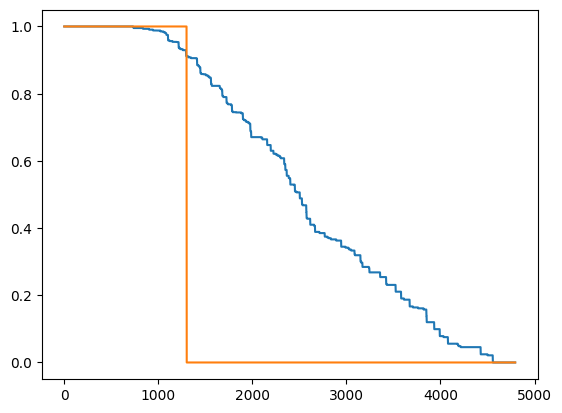

In [9]:
plt.plot(avg_preds[0])
plt.plot(y_test[0])

In [10]:
avg_preds.shape, y_test.shape

(torch.Size([84, 4795]), torch.Size([84, 4795]))

In [11]:
avg_preds

tensor([[1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0034, 0.0034, 0.0034],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.0011, 0.0011, 0.0011],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000]])

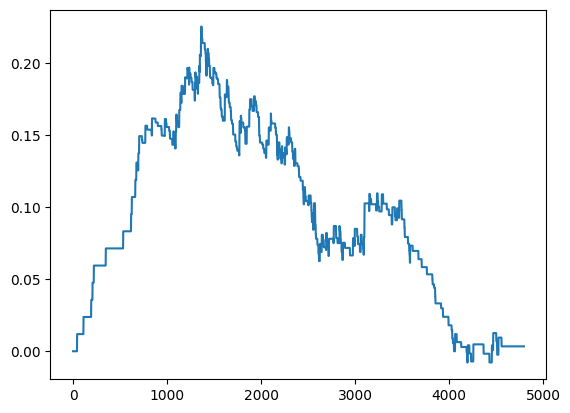

In [12]:
plt.plot(((avg_preds-np.nan_to_num(y_test, 0)**2).mean(axis=0)))

In [13]:
y_test.shape, avg_preds.shape

(torch.Size([84, 4795]), torch.Size([84, 4795]))

In [14]:
class Brier:
  def __init__(self, times, event_observed):
    from lifelines import KaplanMeierFitter
    self.times = times
    self.event_observed = event_observed
    self.num_events = sum(event_observed)
    self.kmf = KaplanMeierFitter()
    self.kmf.fit(self.times, self.event_observed)
    cumulative_censoring_probs = 1 - self.kmf.survival_function_.values
    self.ipcw_coeffs = (1 / cumulative_censoring_probs)[1:]

  def evaluate(self, times_arr, predicted_probs):
    if isinstance(times_arr, torch.Tensor): times_arr = times_arr.numpy()
    if isinstance(predicted_probs, torch.Tensor): predicted_probs = predicted_probs.numpy()
    print(np.power(times_arr - predicted_probs, 2).mean(axis=0).shape)
    brier_score = (self.ipcw_coeffs*np.power(times_arr - predicted_probs, 2)).mean(axis=0) / self.num_events
    return brier_score

(4795,)


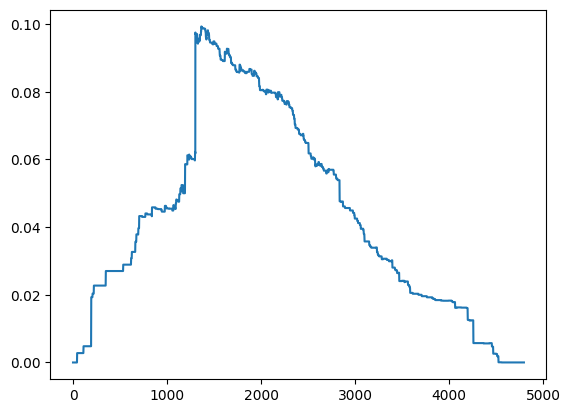

In [15]:
_bs_ = Brier(T_test, E_test)
bs_vspyct = _bs_.evaluate(y_test, avg_preds)
plt.plot(bs_vspyct)

In [3]:
# def brier_score_ipcw(times, times_arr, event_observed, predicted_probs):
#     from lifelines import KaplanMeierFitter
#     if isinstance(times_arr, torch.Tensor): times_arr = times_arr.numpy()
#     if isinstance(predicted_probs, torch.Tensor): predicted_probs = predicted_probs.numpy()
#     num_events = sum(event_observed)
#     kmf = KaplanMeierFitter()
#     kmf.fit(times, event_observed)
#     cumulative_censoring_probs = 1 - kmf.survival_function_.values
#     ipcw_coeffs = 1 / cumulative_censoring_probs
#     ipcw_coeffs = ipcw_coeffs[1:]

#     brier_sum = []
#     for (t, _, pred_prob, ipcw_coeff) in zip(times_arr, event_observed, predicted_probs, ipcw_coeffs): brier_sum.append(ipcw_coeff*(t - pred_prob) ** 2)
#     brier_sum = np.array(brier_sum).mean(axis=0)
#     return brier_sum / num_events

In [16]:
from pysurvival.models.multi_task import LinearMultiTaskModel
mtlr = LinearMultiTaskModel()
mtlr.fit(X_train, T_train, E_train, lr=0.0001, l2_reg=1e-2, init_method='zeros')

predicted_mtlr = mtlr.predict_survival(X_test)
transformed_predictions_mtlr = fix_predictions(predicted_mtlr, mtlr.times, T_train.max())

% Completion: 100%|***********************************************|Loss:  38.03


(4795,)


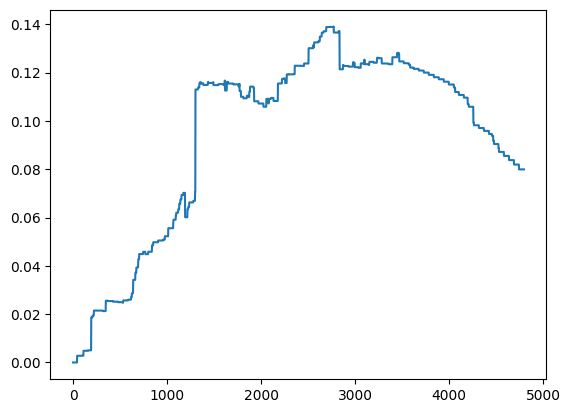

In [17]:
bs_mtlr = _bs_.evaluate(y_test, transformed_predictions_mtlr)
plt.plot(bs_mtlr)

In [18]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=50)
rsf.fit(X_train, T_train, E_train, max_features="sqrt", max_depth=5)

RandomSurvivalForestModel

In [19]:
predicted_rsf = rsf.predict_survival(X_test)
transformed_predictions_rsf = fix_predictions(predicted_rsf, rsf.times, int(T_train.max()))

(4795,)


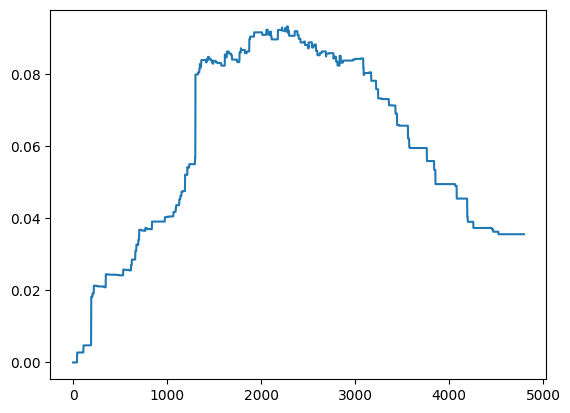

In [20]:
bs_rsf = _bs_.evaluate(y_test, transformed_predictions_rsf)
plt.plot(bs_rsf)

In [19]:
from pysurvival.models.semi_parametric import CoxPHModel

coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.01, l2_reg=1e-2, init_method='zeros')

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 714.551 - ||grad||^2 = 404.22307
 * Iteration #2 - Loss = 698.182 - ||grad||^2 = 399.76632
 * Iteration #3 - Loss = 688.456 - ||grad||^2 = 395.63918
 * Iteration #4 - Loss = 679.989 - ||grad||^2 = 391.58569
 * Iteration #5 - Loss = 672.359 - ||grad||^2 = 387.59254
 * Iteration #6 - Loss = 665.347 - ||grad||^2 = 383.65324
 * Iteration #7 - Loss = 658.821 - ||grad||^2 = 379.76382
 * Iteration #8 - Loss = 652.692 - ||grad||^2 = 375.92157
 * Iteration #9 - Loss = 646.897 - ||grad||^2 = 372.12447
 * Iteration #10 - Loss = 641.387 - ||grad||^2 = 368.37093
 * Iteration #11 - Loss = 636.125 - ||grad||^2 = 364.65965
 * Iteration #12 - Loss = 631.082 - ||grad||^2 = 360.98954
 * Iteration #13 - Loss = 626.233 - ||grad||^2 = 357.35965
 * Iteration #14 - Loss = 621.560 - ||grad||^2 = 353.76914
 * Iteration #15 - Loss = 617.044 - ||grad||^2 = 350.21724
 * Iteration #16 - Loss = 612.672 - ||grad||^2 = 346.70326
 * Iteration #17 - Loss = 

CoxPHModel

In [20]:
predicted_coxph = coxph.predict_survival(X_test)
transformed_predictions_coxph = fix_predictions(predicted_coxph, coxph.times, int(T_train.max()))

In [21]:
bs_ipcw_coxph = brier_score_ipcw(T_test, y_test, E_test, transformed_predictions_coxph)

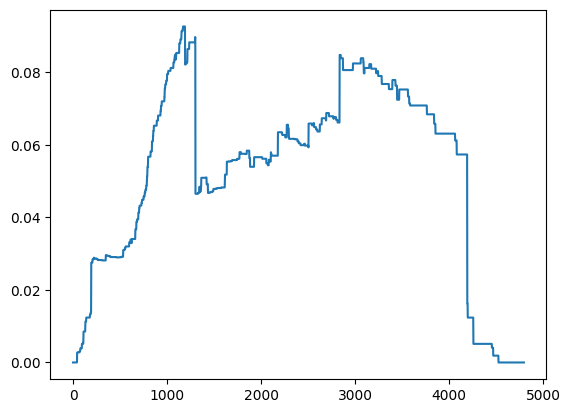

In [22]:
plt.plot(bs_ipcw_coxph)

In [21]:
import spyct

model = spyct.Model()
model.fit(X_train.values, y_train.numpy())

In [22]:
preds_spyct = model.predict(y_test.numpy())

In [23]:
preds_spyct.shape

(84, 4795)

(4795,)


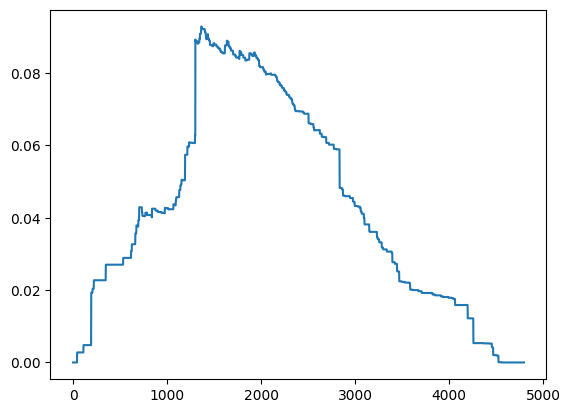

In [24]:
bs_spyct = _bs_.evaluate(y_test, preds_spyct)
plt.plot(bs_spyct)

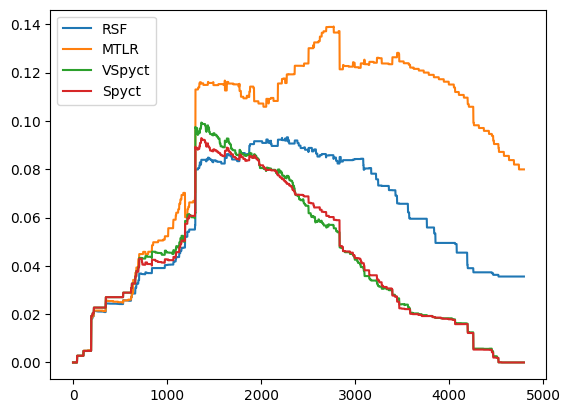

In [25]:
plt.plot(bs_rsf, label='RSF')
plt.plot(bs_mtlr, label='MTLR')
# plt.plot(bs_ipcw_coxph, label='CoxPH')
plt.plot(bs_vspyct, label='VSpyct')
plt.plot(bs_spyct, label='Spyct')
plt.legend()
plt.savefig('../reports/figures/first_brier_scores.pdf', bbox_inches='tight')

Next steps:

1) Adjust the VSpyct model to account for missing target variables. It should work in a SSL manner, same as the original SPYCT - FIXED 
2) Add PyCox models to the game - TODO 
3) Do the evaluations with 5-fold CV - TODO 

In [351]:
def gen_surv_nan(num_samples, num_days=365, missing_prob=0.1, nan_start_day=200):
    num_features = 5  # Replace with the actual number of features

    X = np.random.rand(num_samples, num_features)

    y = np.zeros((num_samples, num_days))
    for i in range(num_samples):
        survival_prob = np.linspace(1, 0, num_days) * np.random.uniform(0.5, 1.5)

        # Introduce missing values after the specified time point
        nan_start_day = min(nan_start_day, num_days)  # Ensure nan_start_day is within the valid range
        missing_indices = np.arange(nan_start_day, num_days)
        y[i, missing_indices] = np.nan

        y[i, :nan_start_day] = survival_prob[:nan_start_day]

    return X, y

def generate_survival_function_data(num_samples, num_days=365):
  X = np.random.rand(num_samples, num_features)  

  y = np.zeros((num_samples, num_days))
  for i in range(num_samples):
    y[i] = np.linspace(1, 0, num_days) * np.random.uniform(0.5, 1.5)

  return X, y

In [160]:
print(fake_weights.shape, y.shape)
print(torch.matmul(fake_weights, y[:,0]))

torch.Size([1000]) torch.Size([1000, 365])
tensor(-6.4459)


In [224]:
def weighted_variance(values, weights, weight_sum):
    mean = torch.matmul(weights, values) / weight_sum
    return -torch.sum(mean*mean)

In [225]:
def wvar(values, weights, weight_sum):
    _list = []
    for i in range(values.shape[1]):
        valid_indices = ~torch.isnan(values[:, i])
        _list.append(torch.matmul(weights[valid_indices], values[valid_indices, i]))
    _list = [z**2 for z in [x/weight_sum.item() for x in _list]]
    return -(sum(_list))

In [347]:
def _wvar(values, weights, weight_sum):
    valid_indices = ~torch.isnan(values)
    weighted_values = values * weights.view(-1, 1)
    weighted_values[~valid_indices] = 0  # Set invalid values to 0
    variance = ((weighted_values.sum(dim=0) / weight_sum) ** 2).sum()
    return -variance

In [353]:
_wvar(y, fake_weights, torch.sum(fake_weights))

tensor(-168.5716)

In [354]:
weighted_variance(y, fake_weights, torch.sum(fake_weights))

tensor(nan)

In [355]:
wvar(y, fake_weights, torch.sum(fake_weights))

tensor(-168.5716)

In [343]:
# Example usage:
num_samples = 1000
num_days = 365
num_features = 10

X, y = generate_survival_function_data(num_samples, num_days=num_days)
X, y = torch.Tensor(X), torch.Tensor(y)

In [352]:
# Example usage:
num_samples = 1000
num_days = 365
num_features = 10

X, y = gen_surv_nan(num_samples, num_days=num_days)
X, y = torch.Tensor(X), torch.Tensor(y)

In [282]:
fake_weights = torch.randn(1000)

In [99]:
y.shape, fake_weights.shape

(torch.Size([1000, 365]), torch.Size([1000]))

In [228]:
print(weighted_variance(y, fake_weights, torch.sum(fake_weights)), wvar(y, fake_weights, torch.sum(fake_weights)))

tensor(-97.7671) tensor(-97.7671)


In [236]:
weighted_variance(y, fake_weights, torch.sum(fake_weights)) - wvar(y, fake_weights, torch.sum(fake_weights))

tensor(1.5259e-05)

In [117]:
wvar(y, fake_weights, torch.sum(fake_weights)).shape

torch.Size([1000])

In [268]:
def impurity(values): return torch.sum(torch.var(values, dim=0))

In [271]:
impurity(y)

tensor(9.8679)

In [274]:
torch.var(y, dim=0).shape

torch.Size([365])

In [304]:
def nanvar(y, dim=0):
    mask = ~torch.isnan(y)
    masked_y = y.masked_fill(~mask, 0)
    masked_mean = masked_y.sum(dim=dim) / mask.sum(dim=dim)
    squared_diff = (masked_y - masked_mean.view(1, -1))**2
    var = torch.sum(squared_diff, dim=dim) / (mask.sum(dim=dim) - 1)
    return var

In [341]:
def _nanvar(y, dim=0):
    mean = torch.nanmean(y, dim)
    squared_diff = (y - mean.unsqueeze(dim)) ** 2
    valid_count = torch.sum(~torch.isnan(y), dim)
    variance = torch.nansum(squared_diff, dim) / (valid_count - 1)
    
    return variance

In [344]:
torch.sum(_nanvar(y)), torch.sum(torch.var(y, dim=0))

(tensor(10.3796), tensor(10.3796))

In [331]:
torch.var(y.numpy(), axis=0)

AttributeError: module 'torch' has no attribute 'nanvar'

In [346]:
_nanvar(y).shape

torch.Size([365])

In [ ]:
# vidi gi posteriorite za root node i sporedi gi so priorite. Kolku se imaat pomesteno?
# proveri deka predictive semplira od posteriorite a ne od nesto drugo
# sporedba posterior na root node na vspyct so root nodovite na site drva od ensemble od originalen spyct

In [34]:
model.root_node.split_model.

AttributeError: 'PyroLinear' object has no attribute 'posterior'

In [37]:
import pyro
trace = pyro.poutine.trace(model.root_node.split_model).get_trace()

TypeError: forward() missing 1 required positional argument: 'input'

In [50]:
model.root_node.split_model

PyroLinear(in_features=769, out_features=1, bias=True)

In [59]:
import seaborn as sns
from pyro.infer import Predictive

num_samples = 1000

predictive = Predictive(model = model.root_node.split_model, guide = model.root_node.guide, num_samples=num_samples)
svi_samples = {k: v.detach().cpu().numpy()
               for k, v in predictive(X_test).items()}

# sites = ['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc4.weight', 'fc4.bias', 'sigma']

# fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
# fig.suptitle("Marginal Posterior density - Regression Coefficients", fontsize=16)
# for i, ax in enumerate(axs.reshape(-1)):
#     if i == 8:
#         i = 7
#     print(i)
#     site = sites[i]
#     sns.distplot(svi_samples[site], ax=ax, label="SVI (DiagNormal)")
#     ax.set_title(site)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right')

In [65]:
predictive_prior = Predictive(model = model.root_node.split_model, guide = {}, num_samples=num_samples)
svi_samples_prior = {k: v.detach().cpu().numpy()
               for k, v in predictive(X_test).items()}

/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_44637/675484477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(svi_samples_prior['linear.weight'])
/var/folders/6s/30hzfwv55yqb02p59m4zk_b00000gn/T/ipykernel_44637/675484477.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(svi_sa

<Axes: ylabel='Density'>

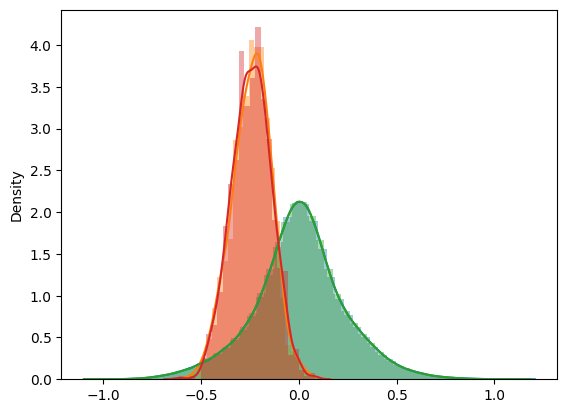

In [67]:
sns.distplot(svi_samples_prior['linear.weight'])
sns.distplot(svi_samples_prior['linear.bias'])

sns.distplot(svi_samples['linear.weight'])
sns.distplot(svi_samples['linear.bias'])